In [1]:
import arviz as az
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

%matplotlib inline

In [13]:
def generate_posterior(prior, successes, tosses):
    p_grid = np.linspace(0, 1, prior.shape[0])
    likelihood= stats.binom.pmf(k=successes, n=tosses, p=p_grid)
    unstd_posterior = prior * likelihood
    std_posterior = unstd_posterior/unstd_posterior.sum()
    return p_grid, std_posterior

#### Easy

In [20]:
prior = np.ones((1000))
p_grid, posterior = generate_posterior(prior, 6, 9)
np.random.seed(100)
p_samples = np.random.choice(p_grid, size=1000, p=posterior)

In [22]:
# 3E1.
np.mean(p_samples<0.2)

0.002

In [23]:
# 3E2.
np.mean(p_samples>0.8)

0.122

In [25]:
# 3E3.
np.mean((p_samples>0.2) & (p_samples<0.8))

0.876

In [26]:
# 3E4.
np.quantile(p_samples, 0.2)

0.5165165165165165

In [27]:
# 3E5.
np.quantile(p_samples, 0.8)

0.7587587587587588

In [31]:
# 3E6.
az.hpd(p_samples, 0.66)

array([0.50550551, 0.77377377])

In [34]:
# 3E7.
np.quantile(p_samples, q=((1-0.66)/2, (1+0.66)/2))

array([0.5005005 , 0.77177177])

#### Medium

In [68]:
# 3M1.
k, n = 8, 15
prior = np.ones((1000))
p_grid, posterior = generate_posterior(prior, k, n)

In [69]:
# 3M2.
n_samples = int(1e5)
p_samples = np.random.choice(p_grid, size=n_samples, p=posterior)
print("median(p)=", np.median(p_samples))
print("HPDI 90%", az.hpd(p_samples, 0.9))

median(p)= 0.5305305305305306
HPDI 90% [0.33533534 0.72072072]


In [70]:
# 3M3.
obs_simulated = stats.binom.rvs(n=n, p=p_samples)
print("P(8 water in 15 tosses) =", np.mean(obs_simulated==8))

P(8 water in 15 tosses) = 0.14699


In [71]:
# 3M4.
print("P(6 water in 9 tosses) =", np.sum(stats.binom.pmf(k=6, n=9, p=p_grid) * posterior))

P(6 water in 9 tosses) = 0.17638982366401934


In [72]:
# 3M5 with new prior
k, n = 8, 15
prior = np.repeat((0,1), 500)
p_grid, posterior = generate_posterior(prior, k, n)

# redo 3M2
p_samples = np.random.choice(p_grid, size=n_samples, p=posterior)
print("median(p)=", np.median(p_samples))
print("HPDI 90%", az.hpd(p_samples, 0.9))

# redo 3M3
obs_simulated = stats.binom.rvs(n, p=p_samples)
print("P(8 water in 15 tosses) =", np.mean(obs_simulated==8))

# redo 3M4
print("P(6 water in 9 tosses) =", np.sum(stats.binom.pmf(k=6,n=9,p=p_grid)*posterior))

median(p)= 0.5955955955955956
HPDI 90% [0.5005005  0.71171171]
P(8 water in 15 tosses) = 0.15441
P(6 water in 9 tosses) = 0.23230713290578214


#### Hard

In [217]:
birth1 = np.array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
                   1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])
birth2 = np.array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
                   1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
                   0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

#### 3H1.

In [218]:
k = np.sum(birth1) + np.sum(birth2)
n = len(birth1) + len(birth2)
prior = np.ones((1000))
p_grid, posterior = generate_posterior(prior, k, n)

# parameter value maximizes the posterior probability
p_grid[posterior.argmax()]

0.5545545545545546

#### 3H2.

In [219]:
p_samples = np.random.choice(p_grid, size=int(1e5), p=posterior)

print("HPDI 50%", az.hpd(p_samples, 0.5))
print("HPDI 89%", az.hpd(p_samples, 0.89))
print("HPDI 97%", az.hpd(p_samples, 0.97))

HPDI 50% [0.52552553 0.57257257]
HPDI 89% [0.4964965  0.60760761]
HPDI 97% [0.47947948 0.62962963]


In [82]:
pd.DataFrame(
    [[interval] + list(pm.hpd(p_samples, interval)) + [p_samples.mean()]
     for interval in (.50, .89, .97)],
    columns=['interval', 'lower', 'upper', 'mean_']
)

,interval,lower,upper,mean_
0,0.50,0.530531,0.576577,0.554612
1,0.89,0.499499,0.609610,0.554612
2,0.97,0.477477,0.627628,0.554612


#### 3H3.

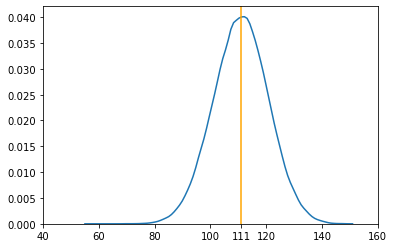

In [105]:
obs_simulated = stats.binom.rvs(n=200, p=p_samples)

# plt.hist(obs_simulated, bins=201, density=True, alpha=.5)
sns.kdeplot(obs_simulated)
plt.axvline(x=111, color='orange')
plt.xticks(ticks=list(plt.xticks()[0])+[111])
pass

#### 3H4.

In [109]:
boys_birth1 = np.sum(birth1)
print("Number of boys as first birth =", boys_birth1)

Number of boys as first birth = 51


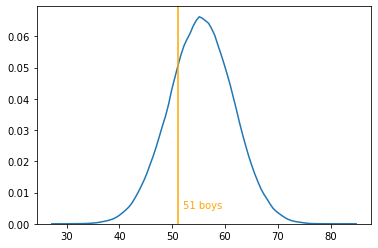

In [114]:
obs_simulated = stats.binom.rvs(n=100, p=p_samples)

sns.kdeplot(obs_simulated)
plt.axvline(x=boys_birth1, color='orange')
plt.text(x=boys_birth1+1, y=0.005, s=f'{boys_birth1} boys', color='orange')
pass

#### 3H5.

In [116]:
girls_birth1 = np.sum(birth1==0)
print("Number of girls as first birth =", girls_birth1)

Number of girls as first birth = 49


In [118]:
boys_after_girls = np.sum((birth1 == 0).astype(int) * birth2)
print("Number of boys born after girl first borns =", boys_after_girls)

Number of boys born after girl first borns = 39


In [153]:
boys_after_boys = np.sum(birth1 * birth2)
print("Number of boys born after boy first borns =", boys_after_boys)

Number of boys born after boy first borns = 21


In [154]:
births=(pd.DataFrame(zip(birth1, birth2), columns=['birth1', 'birth2'], dtype='category')
        .assign(birth1 = lambda df: df.birth1.cat.rename_categories(["girl", "boy"]),
               birth2 = lambda df: df.birth2.cat.rename_categories(["girl", "boy"])))

In [204]:
obs_births_tab = (pd.crosstab(births.birth1,  births.birth2, margins=True)
                 .assign(girl = lambda df: df.girl/df.All,
                        boy = lambda df: df.boy/df.All)
                 .rename(columns={'All':"birth1 Count"}))
obs_births_tab

birth2,girl,boy,birth1 Count
birth1,,,
girl,0.204082,0.795918,49
boy,0.588235,0.411765,51
All,0.400000,0.600000,100


In [148]:
# assume birth1 and birth2 independent
# simulate boy birth for each group
ind_grs_simulated = pd.DataFrame(
    zip(stats.binom.rvs(n=100, p=p_samples), stats.binom.rvs(n=100, p=p_samples)),
    columns = ['birth1', 'birth2'])

In [149]:
ind_grs_simulated.head()

,birth1,birth2
0,50,55
1,58,55
2,55,53
3,56,53
4,50,58


Compare observed boys as secondborn with posterior predictive boys as secondborn.

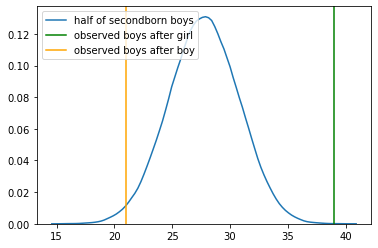

In [158]:
# boys in birth2 simulated
sns.kdeplot(ind_grs_simulated.birth2/2, label="half of secondborn boys")
plt.axvline(x=boys_after_girls, color='g', label='observed boys after girl')
plt.axvline(x=boys_after_boys, color='orange', label='observed boys after boy')
plt.legend(loc=2)

3H4. shows that the current model is off. It assumes independence in consequent births, i.e., gender of the firstborn does not influence gender of the secondborn. 

Fix it.  
Model the second birth seperately, conditioned on the first born gender.

In [198]:
boys_in_birth1 = np.sum(birth1)
girls_in_birth1 = np.sum(birth1==0)
boys_after_boys = np.dot(birth1, birth2.T)
boys_after_girls = np.dot(birth1==0, birth2.T)
n_births = len(birth1) + len(birth2)

# model the first birth
prior = np.ones((1000))
p_grid, posterior_birth1 = generate_posterior(prior, boys_in_birth1, len(birth1))

# model the second birth
_, posterior_boy_after_boy = generate_posterior(prior, boys_after_boys, boys_in_birth1)
_, posterior_boy_after_girl = generate_posterior(prior, boys_after_girls, girls_in_birth1)

# sample second birth posterior
p_baboy_samples = np.random.choice(a=p_grid, p=posterior_boy_after_boy, size=int(1e5))
p_bagirl_samples = np.random.choice(a=p_grid, p=posterior_boy_after_girl, size=int(1e5))

# posterior predictive second birth
np.random.seed(1063)
obs_sim_baboy = stats.binom.rvs(n=50, p=p_baboy_samples)
obs_sim_bagirl = stats.binom.rvs(n=50, p=p_bagirl_samples)

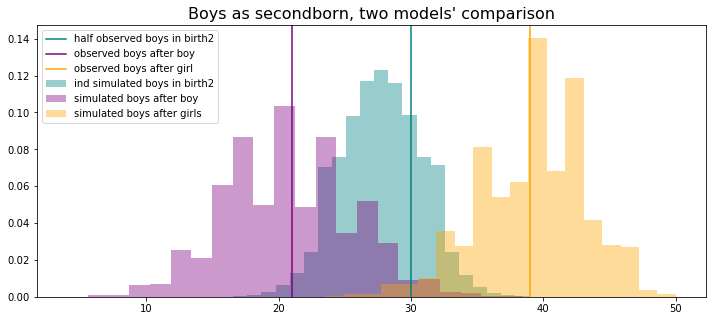

In [208]:
plt.figure(figsize=(12,5))

# boys from group independent model
plt.hist(ind_grs_simulated.birth2/2, color='teal', bins=23, alpha=.4, density=True, label="ind simulated boys in birth2")
plt.axvline(x=np.sum(birth2)/2, color='teal', label='half observed boys in birth2')

# boys after boy from conditioned model
plt.hist(obs_sim_baboy, color='purple', bins=23, alpha=.4, density=True, label="simulated boys after boy")
plt.axvline(boys_after_boys, color='purple', label="observed boys after boy")

# boys after gril from conditioned model
plt.hist(obs_sim_bagirl, color='orange', bins=23, alpha=.4, density=True, label="simulated boys after girls")
plt.axvline(boys_after_girls, color='orange', label="observed boys after girl")

plt.title("Boys as secondborn, two models' comparison", fontsize=16)
plt.legend(loc=2)
pass

The original model with independence assumption underestimates the number of boys as secondborn. Under the conditional model, we can clearly see that when girls are the first born, it is more likely that the second born is a boy. Gender bias against girls?? Given this set of data, it is not the sole factor contributing to the gap between boys after boys and boys after girls. 

**Alternative Cause**  
In my opinion, the gap can also be caused by the case that people like to have one kid in each gender.  
My reasonings: 
1. The observed girls after boy is also higher than boys after boy, 59% vs 41%. 
2. In crosstab table below, vals in / diagonal are higher than vals in \ diagonal. Opposite gender is more frequent, conditioned on firstborn gender.
3. In plot 'Boy or Girl, given boy as firstborn' below, the two distributions are quite seperated.  It is more likely to have a girl given first born is boy.

**In summary**  
It is more likly to have a secondborn child in opposite gender to the first born's gender.  Gender bias against girls as well as parents' preference in having a boy & a girl can be the two contributing factors. 

**Why not just attributing all to parents' preference?**
1. the gap between boys after girls and boys after boys --> potential gender bias
2. the gap between girls after boys and boys after boys --> parents' preference

Gap 1. is much wider than Gap 2. Plus the overlapping area in 'Boys as secondborn' plot is much smaller than that in 'Boy or Girl, given boys as firstborn' plot.

In [207]:
obs_births_tab

birth2,girl,boy,birth1 Count
birth1,,,
girl,0.204082,0.795918,49
boy,0.588235,0.411765,51
All,0.400000,0.600000,100


In [214]:
girls_after_boy = np.dot(birth1, (birth2==0).T)

# model the second birth of girls after boy
_, posterior_girl_after_boy = generate_posterior(prior, girls_after_boy, boys_in_birth1)

# sample second birth posterior of girls after boy
p_grilaboy_samples = np.random.choice(a=p_grid, p=posterior_girl_after_boy, size=int(1e5))

# posterior predictive second birth of girls after boy
np.random.seed(1063)
obs_sim_girlaboy = stats.binom.rvs(n=50, p=p_grilaboy_samples)

In [234]:
# median and HPDI
print("median of boys after boy:", np.round(np.median(p_baboy_samples),2))
print("median of girls after boy:", np.round(np.median(p_grilaboy_samples),2))

hpdi_bab = az.hpd(p_baboy_samples, 0.9)
hpdi_gab = az.hpd(p_grilaboy_samples, 0.9)
print("HPDI 90% of boys after boy:", np.round(hpdi_bab,2))
print("HPDI 90% of girls after boy:", np.round(hpdi_gab,2))

print("ratio of overlapping HPDI: {:.2f}".format(np.divide(hpdi_bab[1]-hpdi_gab[0],hpdi_gab[1]-hpdi_gab[0])))

median of boys after boy: 0.41
median of girls after boy: 0.59
HPDI 90% of boys after boy: [0.3  0.52]
HPDI 90% of girls after boy: [0.47 0.69]
ratio of overlapping HPDI: 0.25


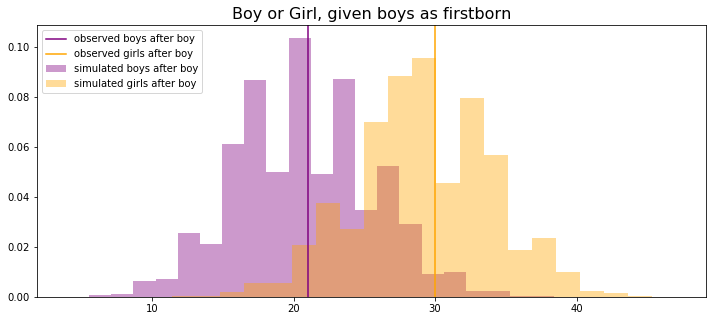

In [215]:
plt.figure(figsize=(12,5))

# boys after boy from conditioned model
plt.hist(obs_sim_baboy, color='purple', bins=23, alpha=.4, density=True, label="simulated boys after boy")
plt.axvline(boys_after_boys, color='purple', label="observed boys after boy")

# girls after boy from conditioned model
plt.hist(obs_sim_girlaboy, color='orange', bins=23, alpha=.4, density=True, label="simulated girls after boy")
plt.axvline(girls_after_boy, color='orange', label="observed girls after boy")

plt.title("Boy or Girl, given boys as firstborn", fontsize=16)
plt.legend(loc=2)
pass